In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

In [3]:
base = [Image.open(f's{pasta}/{fig}.pgm').convert('L')  for pasta in range(1,41) for fig in range(1,11)]


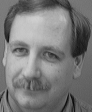

In [4]:
input_img = Image.open(f'4.pgm').convert('L')
input_img

In [5]:
M=len(base)
M

400

In [6]:
X = np.array([base[i].getdata() for i in range(M)])

In [7]:
X.shape
X

array([[ 48,  49,  45, ...,  47,  46,  46],
       [ 60,  60,  62, ...,  32,  34,  34],
       [ 39,  44,  53, ...,  29,  26,  29],
       ...,
       [125, 119, 124, ...,  36,  39,  40],
       [119, 120, 120, ...,  89,  94,  85],
       [125, 124, 124, ...,  36,  35,  34]])

In [8]:
media = np.mean(X,0)
phi=X-media

In [9]:
media

array([85.63  , 85.585 , 85.9225, ..., 77.9775, 76.8575, 76.115 ])

In [10]:
phi.shape

(400, 10304)

In [11]:
e_faces, sigma, v = np.linalg.svd(phi.transpose(), full_matrices=False)

In [12]:
val_prop=sigma*sigma

In [13]:
traco=sum(val_prop)

In [14]:
confianca_alvo=0.9
k=0
confianca=0
while confianca < confianca_alvo:
    confianca= confianca+val_prop[k]/traco
    k+=1
k, confianca

(109, 0.9004356813743748)

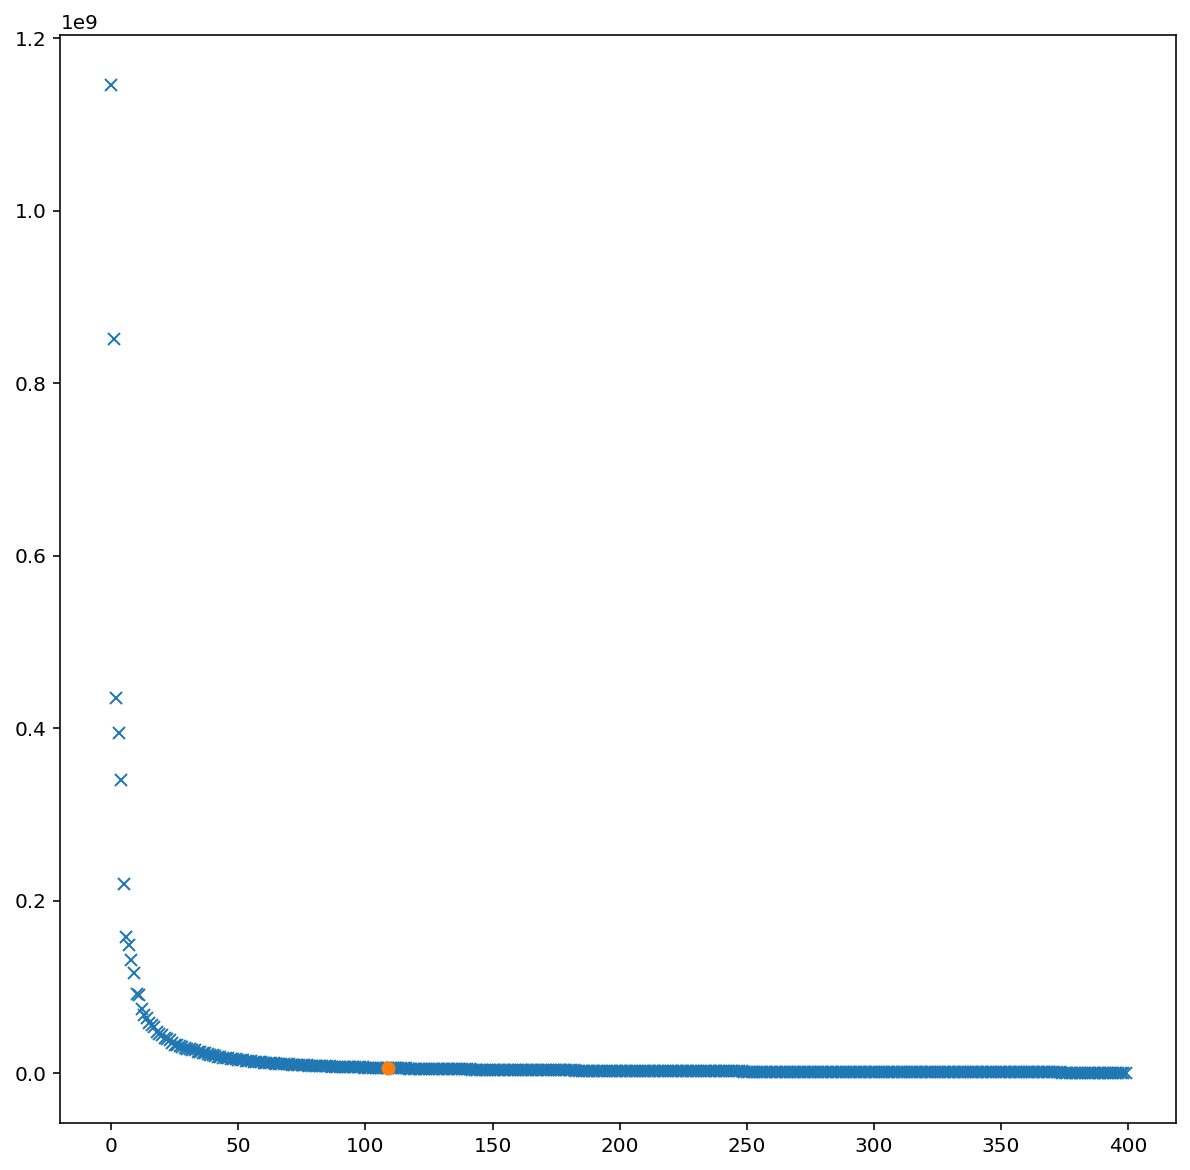

In [26]:
plt.figure(figsize=(10,10))
t = np.arange(0, M, 1)
plt.plot(t, val_prop, 'x')
plt.plot(k, val_prop[k], 'o')
plt.show()

In [16]:
coef_proj = [np.dot(phi[i], e_faces) for i in range(M)]

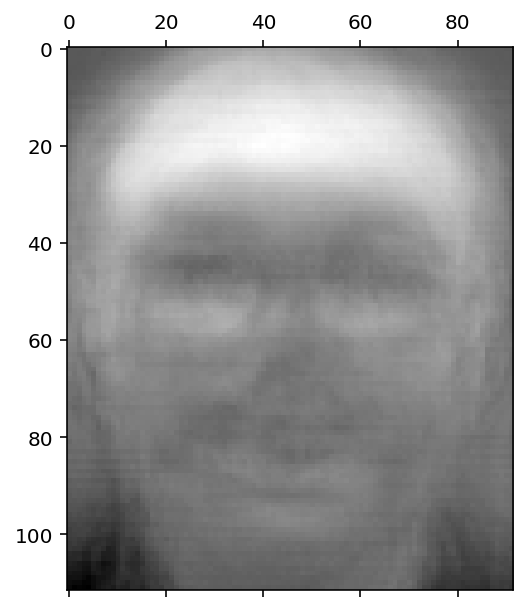

In [16]:
display(plt.matshow(np.reshape(e_faces.T[0], (112,92)), cmap='gray'))

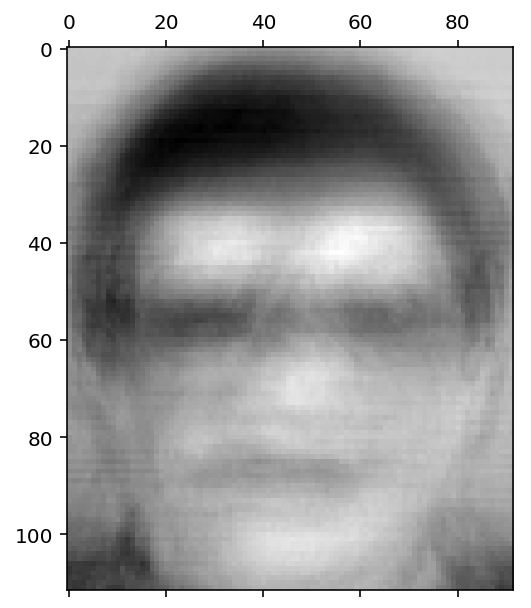

In [17]:
display(plt.matshow(np.reshape(e_faces.T[1], (112,92)), cmap='gray'))

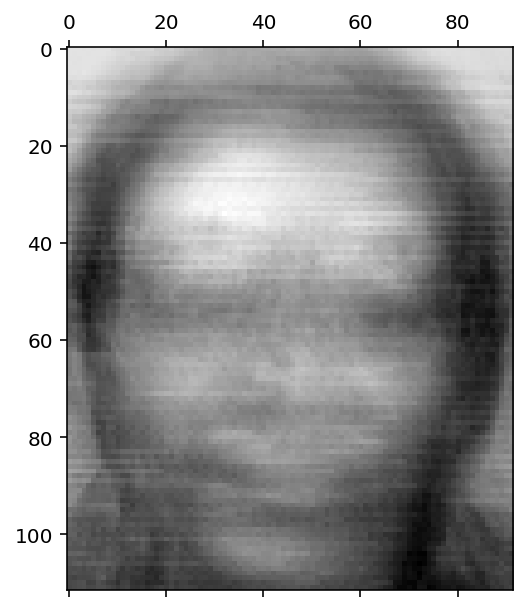

In [18]:
display(plt.matshow(np.reshape(e_faces.T[3], (112,92)), cmap='gray'))

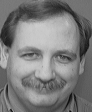

In [19]:
input_img = Image.open(f'1.pgm').convert('L')
input_img

In [20]:
gamma = np.array(input_img.getdata())

In [21]:
test_phi = gamma - media

In [22]:
test_coef_proj = np.dot(test_phi, e_faces)

In [23]:
test_coef_proj.shape

(400,)

In [24]:
dist = [np.linalg.norm(coef_proj[i] - test_coef_proj) for i in range(M)]
d_min = np.min(dist)

In [25]:
len(dist)

400

In [26]:
d_min

1992.503261127547

In [27]:
np.argmin(dist)

242

In [28]:
limite=7000
if d_min < limite:
    pasta = np.floor(np.argmin(dist)/10)+1
    print('Pasta s'f'{pasta}\ndist={d_min}')
else:
    print('Falhou no reconhecimento.')

Pasta s25.0
dist=1992.503261127547


In [29]:
def identify(img):
    gamma = np.array(img.getdata())
    test_phi = gamma - media
    test_coef_proj = np.dot(test_phi, e_faces)
    return test_coef_proj[0:2]

Text(0, 0.5, 'Eigenface 2')

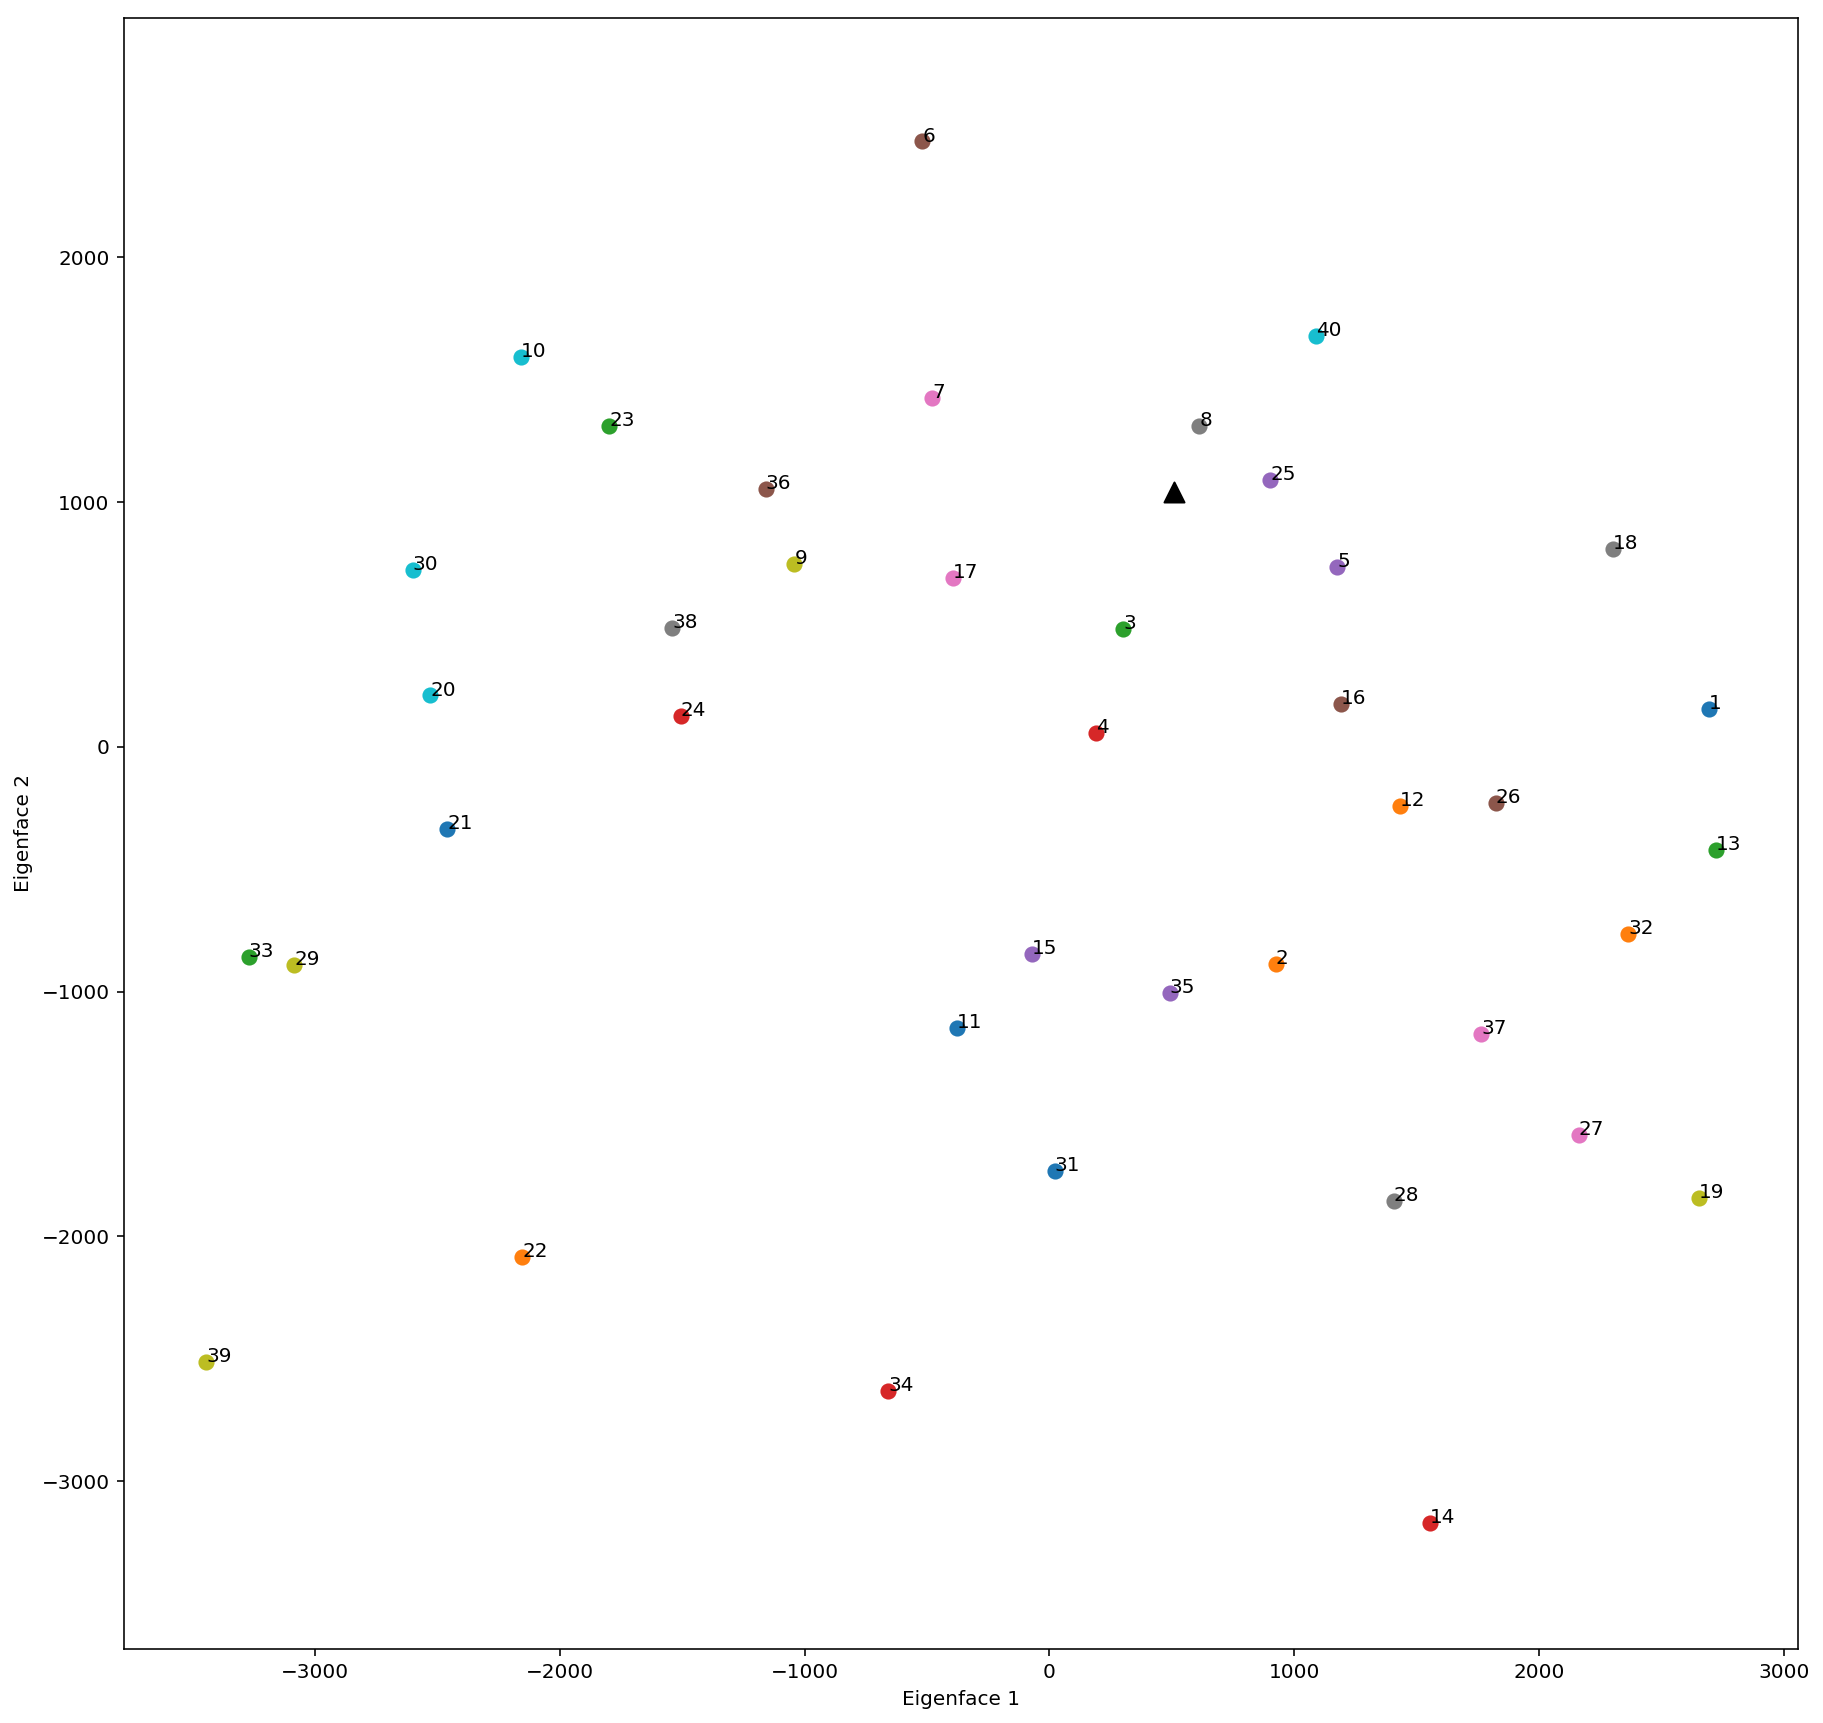

In [30]:
plt.figure(figsize=(15,15))
plt.axis('equal')
for pasta in range(1,41):
    imagens = [Image.open(f's{pasta}/{i}.pgm').convert('L') for i in range(3,4)]
    x, y = np.array([identify(pic) for pic in imagens]).T
    plt.scatter(x,y, s=50)
    plt.text(x, y, pasta)
plt.scatter(*identify(input_img), label='Input image', marker='^', c='k', s=100)
plt.xlabel('Eigenface 1')
plt.ylabel('Eigenface 2')


In [31]:
np.linalg.norm(coef_proj[242] - test_coef_proj)

1992.503261127547

In [32]:
np.linalg.norm(coef_proj[82] - test_coef_proj)

3784.8345070298506